            platform cooperative  technology cooperative  \
date                                                       
2020-12-28                     1                       1   
2020-10-28                     0                       2   
2020-10-22                     0                       1   
2020-12-16                     0                       1   
2020-10-21                     0                       1   
2020-12-15                     0                       1   
2020-12-24                     0                       1   
2020-12-05                     0                       1   
2021-01-04                     0                       0   
2020-12-03                     0                       0   
2020-11-12                     0                       0   
2020-11-18                     0                       0   
2020-12-20                     0                       0   
2020-11-01                     0                       0   
2020-10-19                     0        

<AxesSubplot:xlabel='geoName'>

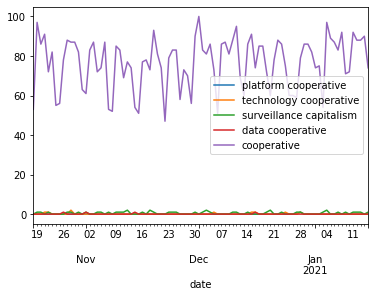

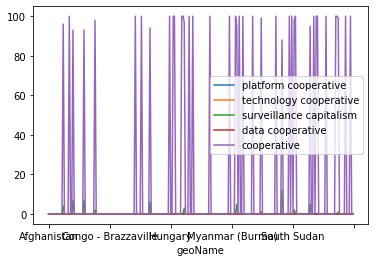

In [42]:
#############################################################################################################################
# Adapted from https://yanwei-liu.medium.com/getting-the-google-trends-data-with-python-67b335e7d1cf and 
# https://towardsdatascience.com/2020-google-search-trends-in-indonesia-from-wfh-ghosting-to-bintang-emon-fcbb357ad9cf

# @Author: Charles Adjovu
# @Date: 2021-01-12
# @Contact: @char 

# References
## 1. https://github.com/GeneralMills/pytrends#related-queries
## 2. https://towardsdatascience.com/2020-google-search-trends-in-indonesia-from-wfh-ghosting-to-bintang-emon-fcbb357ad9cf
## 3. https://yanwei-liu.medium.com/getting-the-google-trends-data-with-python-67b335e7d1cf
#############################################################################################################################
# Importing Libraries
#############################################################################
# Make sure you have downloaded the libraries below before running this cell#
#############################################################################
from pytrends.request import TrendReq
import pandas
import matplotlib.pyplot as plt

# Creating Connection
pytrends = TrendReq(hl='en-US', tz=360)

# Keywords

#keywords = ['Blockchain Cooperative', 'Platform Cooperative', 'Decentralized Cooperative', 'digital democracy', 'social enterprise']

keywords = ['platform cooperative', 'technology cooperative', 'surveillance capitalism', 'data cooperative', 'cooperative']

# Building Payload

pytrends.build_payload(kw_list=keywords,
                       cat=0,
                       timeframe='today 3-m',
                       #geo='', /* can add geography */
                       gprop='')


# Queries

## Interest over time: returns a pandas dataframe

interest_time = pytrends.interest_over_time()
interest_time = interest_time.drop(labels=['isPartial'],axis='columns')
print(interest_time.sort_values(by=keywords, ascending=False)[:20], interest_time.describe(include='all'))


### Visualization
image_interest_time = interest_time.plot()


### Saving image 
fig = image_interest_time.get_figure()
fig.savefig('figure.png')

### Saving csv

#interest_time.to_csv('GoogleTrends_2021_0112.csv', encoding='utf_8_sig')


## Related Queries: returns a dictionary of pandas dataframes

related_queries = pytrends.related_queries()
print(related_queries.keys())

for x in related_queries.keys():
    print(related_queries[x])

## Regions by interest:

interestRegion = pytrends.interest_by_region(resolution='COUNTRY', inc_geo_code=True)
print(interestRegion.describe(include='all'))
print(interestRegion.columns)
print(interestRegion.sort_values(by='platform cooperative', ascending=False)[:50])
interestRegion.plot()





HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)


<AxesSubplot:xlabel='date'>

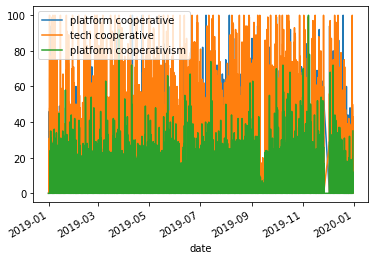

In [37]:
## Historical Hourly Interest
historical_hourly_interest = pytrends.get_historical_interest(keywords, year_start=2019, month_start=1, day_start=1, 
                                 hour_start=0, year_end=2019, month_end=12, day_end=31, hour_end=0, cat=0, geo='', 
                                 gprop='', sleep=60)
print(historical_hourly_interest.sort_values(by=keywords, ascending=False)[:20]
print(historical_hourly_interest.describe(include='all'))
historical_hourly_interest.plot()